In [3]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
from sklearn import mixture

from sklearn.datasets import make_blobs

%matplotlib inline

In [4]:
sklearn.__version__

'0.19.0'

## K-Means & GMM

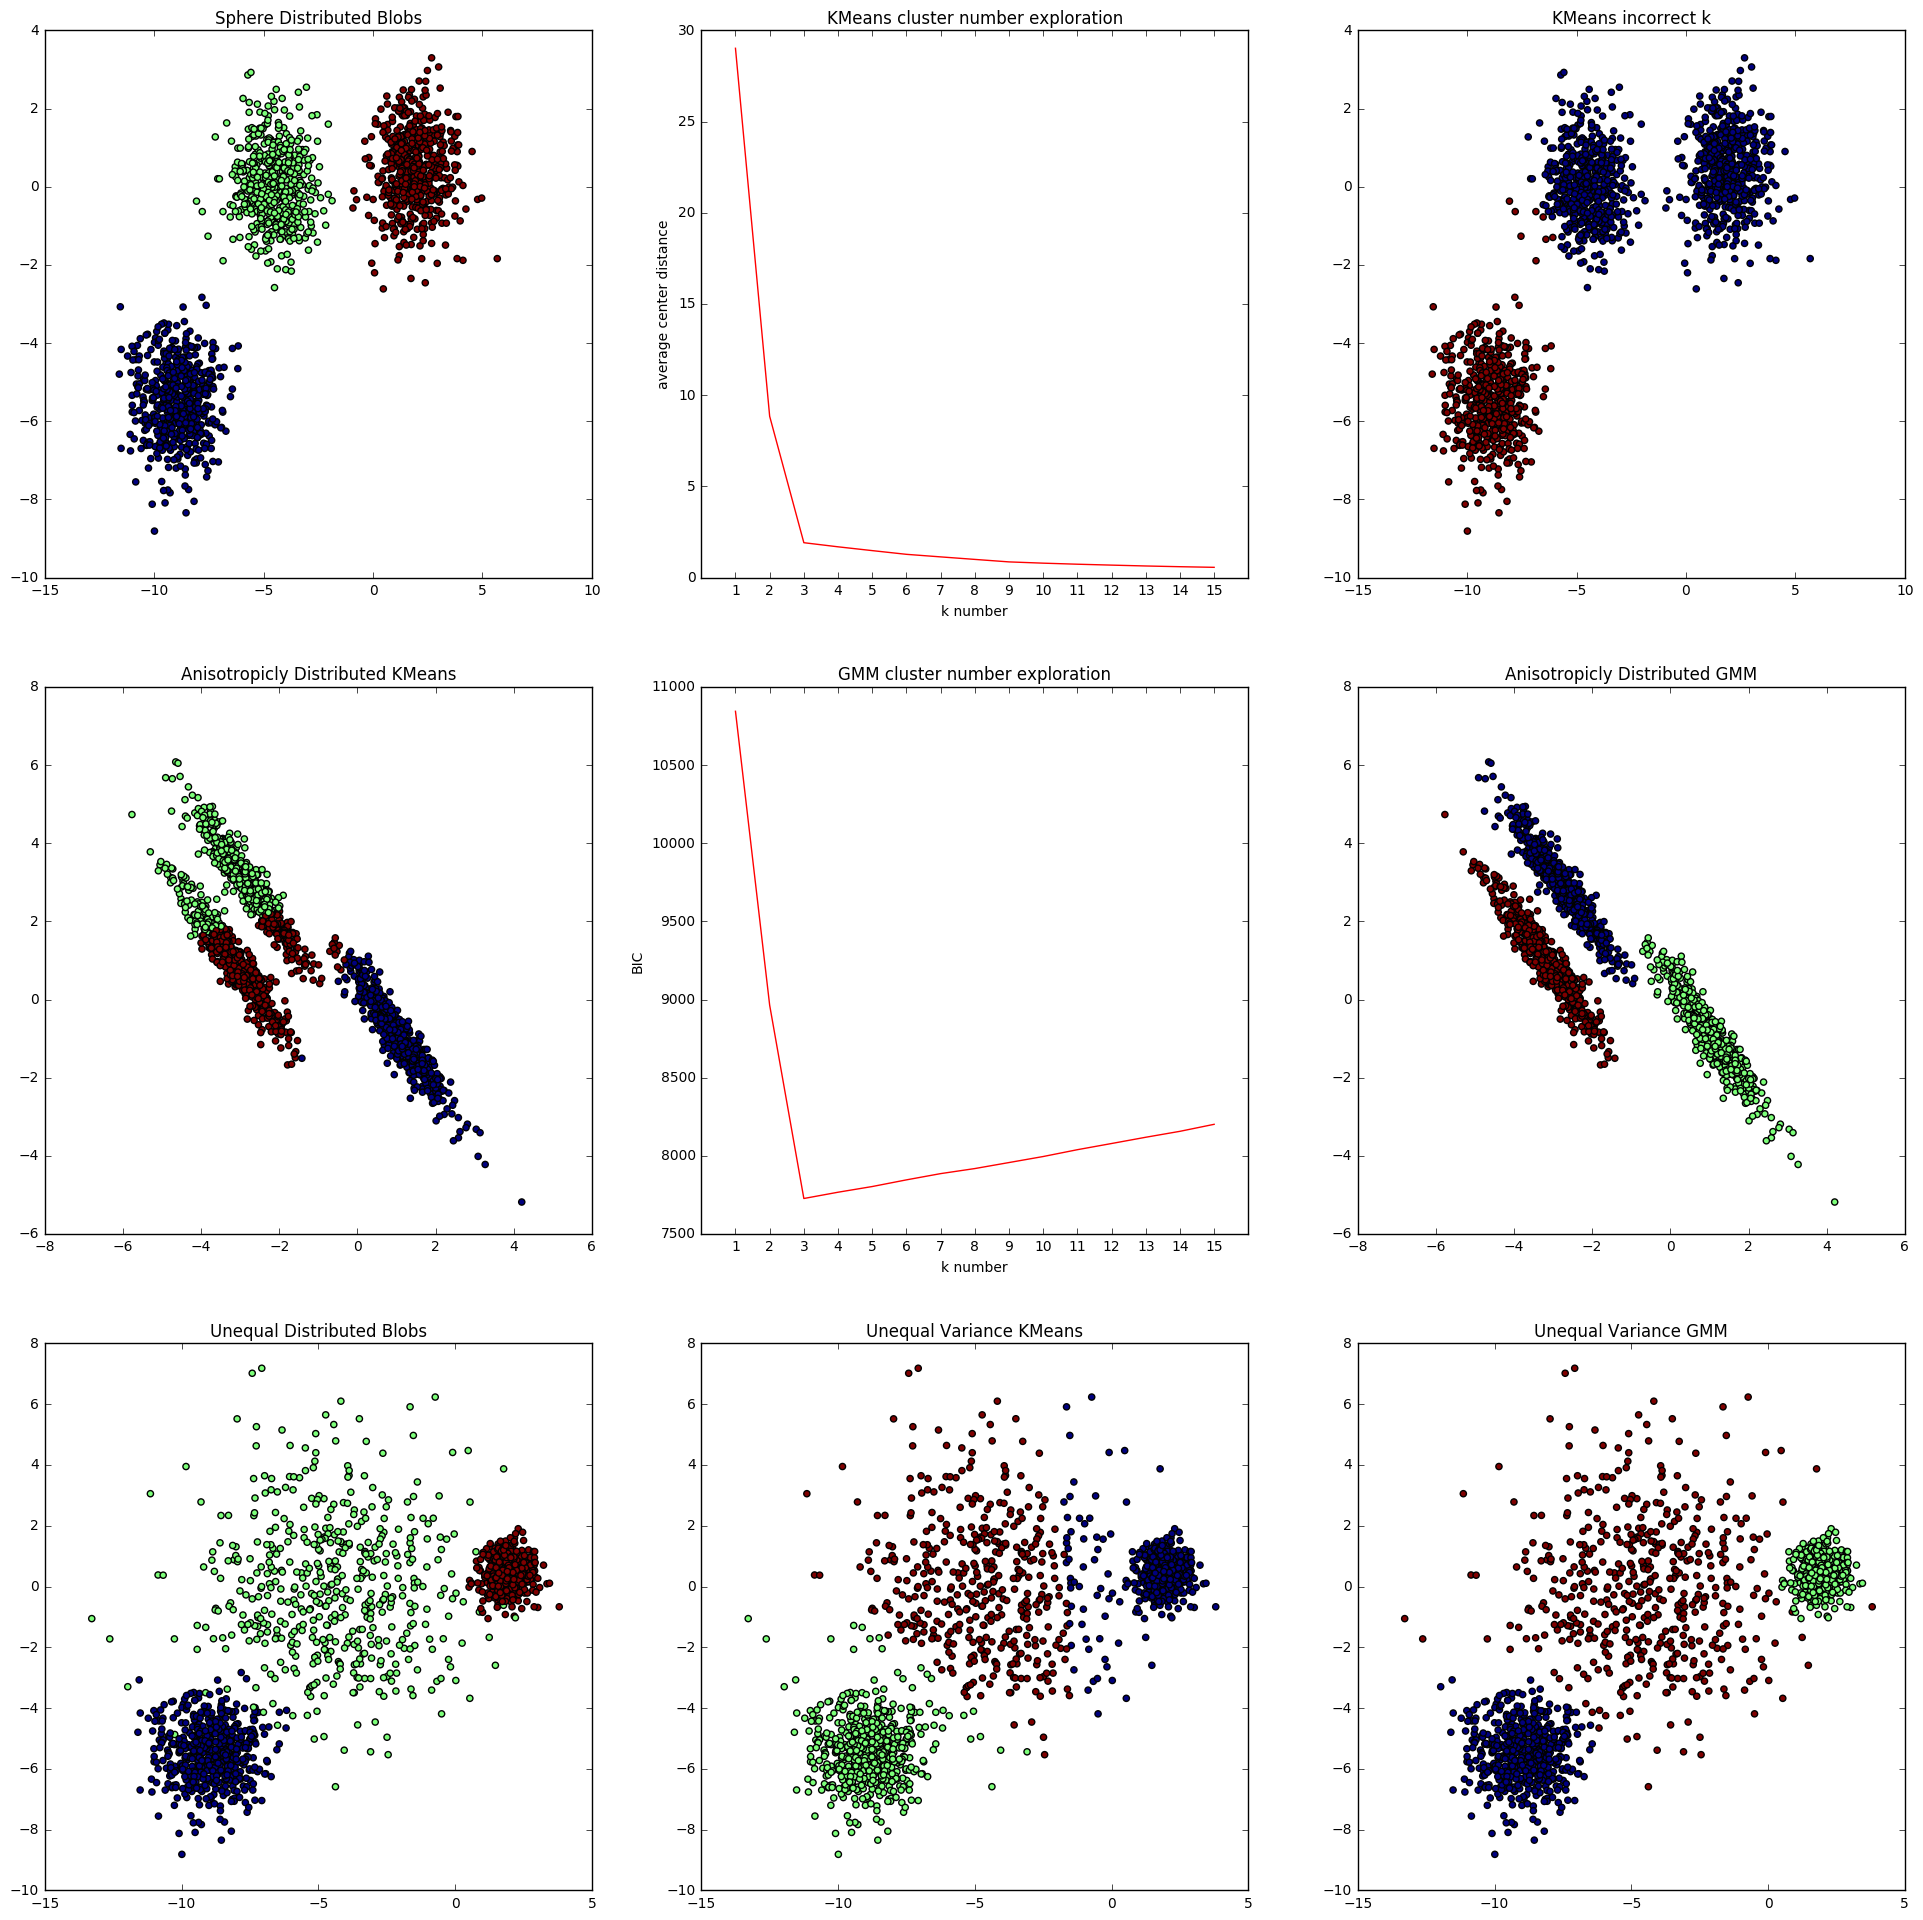

In [5]:
# generate data
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples = n_samples, n_features = 2, centers = 3, random_state = random_state)

# Sphere Distributed Blobs
## ground truth
plt.figure(figsize = (24, 24))
plt.subplot(3, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.title("Sphere Distributed Blobs")

## explore k
errs = []
for i in xrange(1, 16):
    kmeans = KMeans(n_clusters = i, random_state = random_state)
    kmeans.fit(X)
    err = kmeans.inertia_ / float(n_samples)
    # print err
    errs.append(err)
ax = plt.subplot(3, 3, 2)
ax.plot(range(1, 16), errs, 'r')
ax.set_xticks(range(1, 16))
ax.set_xlabel("k number")
ax.set_ylabel("average center distance")
ax.set_title("KMeans cluster number exploration")

## incorrect number of clusters
y_pred = KMeans(n_clusters = 2, random_state = random_state).fit_predict(X)
plt.subplot(3, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c = y_pred)
plt.title("KMeans incorrect k")

# Anisotropicly Distributed Blobs
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters = 3, random_state = random_state).fit_predict(X_aniso)

plt.subplot(3, 3, 4)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c = y_pred)
plt.title("Anisotropicly Distributed KMeans")

## Try GMM in this case
bic = []
for i in xrange(1, 16):
    gmm = mixture.GaussianMixture(n_components = i, covariance_type = 'full')
    gmm.fit(X_aniso)
    bic.append(gmm.bic(X_aniso))
ax = plt.subplot(3, 3, 5)
ax.plot(range(1, 16), bic, 'r')
ax.set_xticks(range(1, 16))
ax.set_xlabel("k number")
ax.set_ylabel("BIC")
ax.set_title("GMM cluster number exploration")

gmm = mixture.GaussianMixture(n_components = 3, covariance_type = 'full')
gmm.fit(X_aniso)
y_pred = gmm.predict(X_aniso)
plt.subplot(3, 3, 6)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c = y_pred)
plt.title("Anisotropicly Distributed GMM")

# Unequal Variance Blobs
X_varied, y_varied = make_blobs(n_samples = n_samples,
                                cluster_std = [1.0, 2.5, 0.5],
                                random_state = random_state)

plt.subplot(3, 3, 7)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c = y_varied)
plt.title("Unequal Distributed Blobs")

y_pred = KMeans(n_clusters = 3, random_state = random_state).fit_predict(X_varied)
plt.subplot(3, 3, 8)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c = y_pred)
plt.title("Unequal Variance KMeans")

y_pred = mixture.GaussianMixture(n_components = 3, covariance_type = 'full').fit(X_varied).predict(X_varied)
plt.subplot(3, 3, 9)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c = y_pred)
plt.title("Unequal Variance GMM")

plt.show()

## Spectral Clustering

/usr/local/lib/python2.7/dist-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


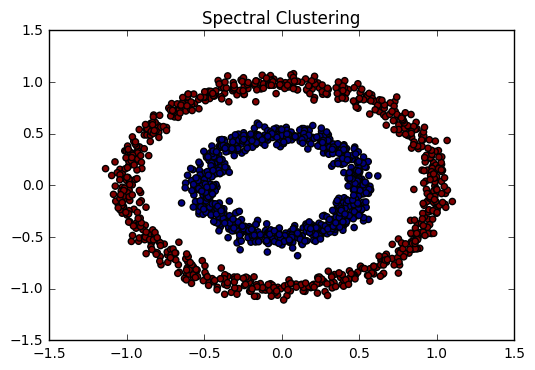

In [6]:
from sklearn.datasets import make_circles
from sklearn.cluster import SpectralClustering

noisy_circles, y_gt = make_circles(n_samples=n_samples, factor=.5, noise=.05)

sc = SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity='nearest_neighbors')
y = sc.fit_predict(noisy_circles)
plt.scatter(noisy_circles[:, 0], noisy_circles[:, 1], c=y)
plt.title("Spectral Clustering")

plt.show()

## Kernel K-Means

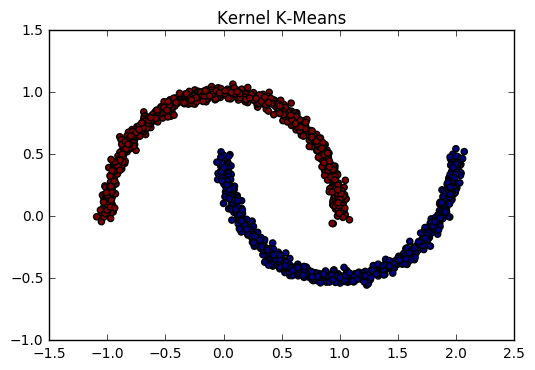

In [7]:
from kernel_kmeans import KernelKMeans
from sklearn.datasets import make_moons

noisy_moons, y_gt = make_moons(n_samples=n_samples, noise=.03, random_state=2)

kkm = KernelKMeans(n_clusters=2, max_iter=100, kernel='rbf', gamma=6.5, random_state=15)
kkm.fit(noisy_moons)
y = kkm.predict(noisy_moons)
plt.scatter(noisy_moons[:, 0], noisy_moons[:, 1], c=y)
plt.title("Kernel K-Means")

plt.show()